# Cross Validation

* **Evaluate your model's performance with cross validation and using different metrics.**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

In [7]:
df = pd.read_csv("data/heart_disease.csv")
df.isnull().sum()*100/df.shape[0]

age            0.0
sex            0.0
cp             0.0
trestbps       0.0
chol           0.0
fbs            0.0
restecg        0.0
thalach        0.0
exang          0.0
oldpeak        0.0
slope          0.0
ca             0.0
thal           0.0
num            0.0
is_positive    0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          176 non-null    float64
 1   sex          176 non-null    float64
 2   cp           176 non-null    float64
 3   trestbps     176 non-null    float64
 4   chol         176 non-null    float64
 5   fbs          176 non-null    float64
 6   restecg      176 non-null    float64
 7   thalach      176 non-null    float64
 8   exang        176 non-null    float64
 9   oldpeak      176 non-null    float64
 10  slope        176 non-null    float64
 11  ca           176 non-null    float64
 12  thal         176 non-null    float64
 13  num          176 non-null    object 
 14  is_positive  176 non-null    int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 20.8+ KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,is_positive
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative,0
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative,0
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative,0
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative,0
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative,0


In [10]:
X = df.drop(["num","is_positive"], axis = 1)
y = df.is_positive

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [12]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 140
No.1 Test set size     : 36
---------------------------- 

No.2 Train set size : 141
No.2 Test set size     : 35
---------------------------- 

No.3 Train set size : 141
No.3 Test set size     : 35
---------------------------- 

No.4 Train set size : 141
No.4 Test set size     : 35
---------------------------- 

No.5 Train set size : 141
No.5 Test set size     : 35
---------------------------- 



In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_indeks], y.iloc[train_indeks]
    X_test, y_test = X.iloc[test_indeks], y.iloc[test_indeks]
    
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.972
----------------------- 

Piece No.2 score: 0.971
----------------------- 

Piece No.3 score: 0.914
----------------------- 

Piece No.4 score: 0.943
----------------------- 

Piece No.5 score: 0.943
----------------------- 



In [16]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.95


In [17]:
# Cross Validation with cross_val_score() and cross_validate()

In [27]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LogisticRegression()
cv = cross_validate(estimator = model, 
                    X = X,
                    y = y,
                    cv = 10,
                    return_train_score=True
                    )

print("Test score : \n {}, \n mean : {} \n".format(cv["test_score"],cv["test_score"].mean()))
print("Train score : \n{} ,\n mean : {}".format(cv["train_score"],cv["train_score"].mean()))

Test score : 
 [1.         1.         0.88888889 0.94444444 0.88888889 0.88888889
 0.94117647 1.         1.         0.88235294], 
 mean : 0.9434640522875817 

Train score : 
[0.96202532 0.96202532 0.98101266 0.96835443 0.96202532 0.98734177
 0.97484277 0.97484277 0.96226415 0.97484277] ,
 mean : 0.970957726295677


In [32]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = cross_validate(estimator = model,
                    X = X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2', 'recall']
                   )

In [35]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}'.format(cv['train_precision'].mean()))
print('Train Set Mean Recall : {:.2f}\n'.format(cv['train_recall'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))
print('Test Set Mean Recall : {:.2f}\n'.format(cv['test_recall'].mean()))

Train Set Mean Accuracy  : 0.97  
Train Set Mean R-square  : 0.58  
Train Set Mean Precision : 0.88
Train Set Mean Recall : 0.71

Test Set Mean Accuracy   : 0.94  
Test Set Mean R-square   : 0.19  
Test Set Mean Precision  : 0.58  
Test Set Mean Recall : 0.60



* **Determine the model with the most appropriate parameters by hyperparameter tuning.**

In [37]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [40]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [41]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1, 'penalty': 'l2'}
Best Score      :  0.95


In [42]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head())
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001199,0.000401,0.000000,0.0000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.015768,0.020003,0.001898,0.0003,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.933333,1.0,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.93619,0.021317,6
2,0.000701,0.000459,0.000000,0.0000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.012969,0.000612,0.001899,0.0003,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.933333,1.0,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.93619,0.021317,6
4,0.000702,0.000460,0.000000,0.0000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [43]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
11,l2,1,0.950000
9,l2,0.1,0.943333
13,l2,10,0.942857
15,l2,100,0.942857
19,l2,10000,0.942857
1,l2,1e-05,0.936190
3,l2,0.0001,0.936190
5,l2,0.001,0.936190
7,l2,0.01,0.936190
17,l2,1000,0.935714


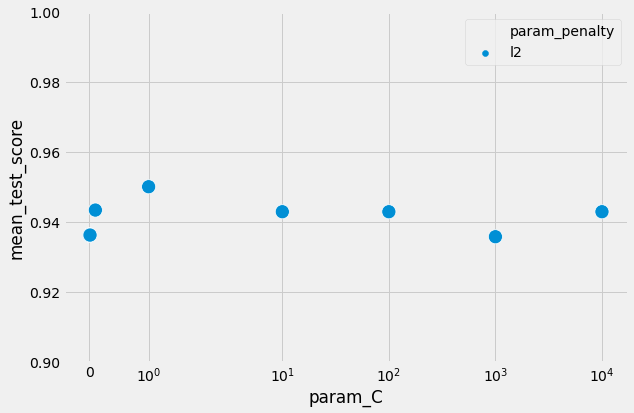

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))

plt.show()

* **Our best result parameters are {'C': 1, 'penalty': 'l2'}**